In [260]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

# NN
from keras import models
from keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
keras.__version__
from keras import regularizers


In [261]:
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [262]:
#Create a dummy variable for the women who had affair
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [263]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [264]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [265]:
df['Had_Affair'].value_counts()

0    4313
1    2053
Name: Had_Affair, dtype: int64

In [266]:
#Create dummies for occupations
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [267]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [268]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [269]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [270]:
X = pd.concat([X,dummies],axis=1)

In [271]:
X = X.drop(['occ1','hocc1','affairs'],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [272]:
#Define the dependent variable (in this case binary outcome variable, 1 = Had Affair, 0 = Had no Affair)
Y = df.Had_Affair

In [273]:
len(X.columns)

16

In [274]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [275]:
input_shape = X_train.shape[1]

In [276]:
scaler = MinMaxScaler(feature_range=[0,1])
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [289]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [290]:
# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [291]:
# Fit the model
history=model.fit(X_train, Y_train, epochs=20, batch_size=128, 
                  validation_data=(X_test,Y_test))

Train on 4456 samples, validate on 1910 samples
Epoch 1/20
4456/4456 [==============================] - 2s 381us/step - loss: 0.2325 - acc: 0.6629 - val_loss: 0.2003 - val_acc: 0.6618
Epoch 2/20
4456/4456 [==============================] - 0s 71us/step - loss: 0.2042 - acc: 0.6739 - val_loss: 0.1883 - val_acc: 0.7110
Epoch 3/20
4456/4456 [==============================] - 0s 66us/step - loss: 0.1991 - acc: 0.6802 - val_loss: 0.1867 - val_acc: 0.7147
Epoch 4/20
4456/4456 [==============================] - 0s 68us/step - loss: 0.1923 - acc: 0.6943 - val_loss: 0.1887 - val_acc: 0.7031
Epoch 5/20
4456/4456 [==============================] - 0s 74us/step - loss: 0.1953 - acc: 0.7047 - val_loss: 0.1893 - val_acc: 0.7141
Epoch 6/20
4456/4456 [==============================] - 0s 68us/step - loss: 0.1897 - acc: 0.7049 - val_loss: 0.1851 - val_acc: 0.7194
Epoch 7/20
4456/4456 [==============================] - 0s 75us/step - loss: 0.1908 - acc: 0.7074 - val_loss: 0.1837 - val_acc: 0.7225
Epoch 

In [292]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

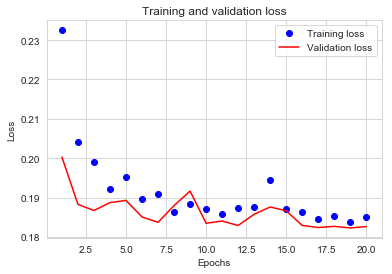

In [293]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

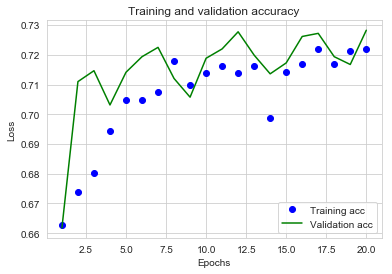

In [294]:
plt.clf()  
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()